In [55]:
martini2= [175,260,90,185,200,200,200,200,225,200,100,100,100,100,260,80,120,200,200,200,200,230,
           170,155,200,200,200,105,75,15,5,20,130]
K_boltzmann = [5.534,4.224,4.689,4.85,4.71,5.995,4.822,1.61,1.5,1.369,5.41,5.58,5.862,1.76,1.1,
               4.56,4.85,5.81,6.071,4.99,5.81,1.775,6.13,1.512,5.067,5.88,1.89,5.597,1.443,4.88,
               5.866,6.785,6.46]
import numpy as np
np.corrcoef(martini2, K_boltzmann)

array([[ 1.        , -0.30350937],
       [-0.30350937,  1.        ]])

In [56]:
distribution_data = [102.353037,31.63079069,117.6982096,123.8548228,85.40109065,111.3309145,71.25896722
                     ,91.74020376,28.87912948,100.1457332,153.1048683,49.49407715,77.19227401,
                     53.37070208,31.18316024,116.4521604,121.9840647,70.4822186,113.0706622,
                     83.78091583,92.44290948,28.64641741,98.17220418,150.7108313,61.94263863,
                     70.51677228,47.57049344,125.6421461,76.72302749,160,121.8215933,125.7839045,
                     118.4848154]
boltzmann_dist_data = [102.08,33.01,114.6,124.07,86.335,111.549,70.875,75.398,28.274,97.389,152.44,
                       48.8,76.956,53.407,34.55,120.89,121.016,70.68,111.43,86.277,92.83,34.56,
                       98.93,150.79,61.3944,70.704,47.12,124.133,75.2566,124.08,124.107,124.05,117.84]
import numpy as np
np.corrcoef(distribution_data, boltzmann_dist_data)

array([[1.       , 0.9820718],
       [0.9820718, 1.       ]])

In [2]:
import pandas as pd
import seaborn as sns
import math
from scipy import stats
import numpy as np
import matplotlib.pyplot as plot
import math
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
angle_dict = dict.fromkeys(['BB1_BB2_BB3','BB2_BB3_ASC1','BB3_ASC1_ASC2','BB3_ASC1_ASC4','ASC1_ASC2_ASC3',\
'ASC2_ASC1_ASC4','ASC2_ASC3_ASC4','ASC3_ASC4_ASC1','BB2_BB3_USC1','BB3_USC1_USC2','BB3_USC1_USC3','USC1_USC2_USC3',\
'USC1_USC2_USC3','USC2_USC1_USC3','USC2_USC3_USC1','BB2_BB3_GSC1','BB3_GSC1_GSC2','BB3_GSC1_GSC4','GSC1_GSC2_GSC3','GSC2_GSC1_GSC4',\
'GSC2_GSC3_GSC4','GSC3_GSC4_GSC1','BB2_BB3_CSC1','BB3_CSC1_CSC2','BB3_CSC1_CSC3','CSC1_CSC2_CSC3','CSC2_CSC1_CSC3',\
'CSC2_CSC3_CSC1','BB2_BB3_pBB1','BB3_pBB1_pBB2','ASC1_BB3_pBB1','USC1_BB3_pBB1','GSC1_BB3_pBB1','CSC1_BB3_pBB1'])

In [4]:
df_Hmapped_angle_all = pd.read_csv('angle_final_allmolecules.xvg')

In [5]:
def return_modes_of_data(data):   
    data = data
    n = np.histogram(data)
    count_dict = {}
    for i in range(0,len(n[0])):
        count_dict[n[0][i]] = n[1][i]
    return sorted(count_dict.items()),data.mean()

In [6]:
BB1_BB2_BB3_Hmapped_angle_all = df_Hmapped_angle_all['BB1_BB2_BB3']
BB2_BB3_ASC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_ASC1']
BB3_ASC1_ASC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_ASC1_ASC2']
BB3_ASC1_ASC4_Hmapped_angle_all = df_Hmapped_angle_all['BB3_ASC1_ASC4']
ASC1_ASC2_ASC3_Hmapped_angle_all = df_Hmapped_angle_all['ASC1_ASC2_ASC3']
ASC2_ASC1_ASC4_Hmapped_angle_all = df_Hmapped_angle_all['ASC2_ASC1_ASC4']
ASC2_ASC3_ASC4_Hmapped_angle_all = df_Hmapped_angle_all['ASC2_ASC3_ASC4']
ASC3_ASC4_ASC1_Hmapped_angle_all = df_Hmapped_angle_all['ASC3_ASC4_ASC1']
BB2_BB3_USC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_USC1']
BB3_USC1_USC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_USC1_USC2']
BB3_USC1_USC3_Hmapped_angle_all = df_Hmapped_angle_all['BB3_USC1_USC3']
USC1_USC2_USC3_Hmapped_angle_all = df_Hmapped_angle_all['USC1_USC2_USC3']
BB3_USC1_USC3_Hmapped_angle_all = df_Hmapped_angle_all['BB3_USC1_USC3']
USC2_USC1_USC3_Hmapped_angle_all = df_Hmapped_angle_all['USC2_USC1_USC3']
USC2_USC3_USC1_Hmapped_angle_all = df_Hmapped_angle_all['USC2_USC3_USC1']
BB2_BB3_ASC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_ASC1']
BB2_BB3_GSC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_GSC1']
BB3_GSC1_GSC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_GSC1_GSC2']
BB3_GSC1_GSC4_Hmapped_angle_all = df_Hmapped_angle_all['BB3_GSC1_GSC4']
GSC1_GSC2_GSC3_Hmapped_angle_all = df_Hmapped_angle_all['GSC1_GSC2_GSC3']
GSC2_GSC1_GSC4_Hmapped_angle_all = df_Hmapped_angle_all['GSC2_GSC1_GSC4']
GSC2_GSC3_GSC4_Hmapped_angle_all = df_Hmapped_angle_all['GSC2_GSC3_GSC4']
GSC3_GSC4_GSC1_Hmapped_angle_all = df_Hmapped_angle_all['GSC3_GSC4_GSC1']
BB2_BB3_CSC1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_CSC1']
BB3_CSC1_CSC2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_CSC1_CSC2']
BB3_CSC1_CSC3_Hmapped_angle_all = df_Hmapped_angle_all['BB3_CSC1_CSC3']
CSC1_CSC2_CSC3_Hmapped_angle_all = df_Hmapped_angle_all['CSC1_CSC2_CSC3']
CSC2_CSC1_CSC3_Hmapped_angle_all = df_Hmapped_angle_all['CSC2_CSC1_CSC3']
CSC2_CSC3_CSC1_Hmapped_angle_all = df_Hmapped_angle_all['CSC2_CSC3_CSC1']
BB2_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['BB2_BB3_pBB1']
BB3_pBB1_pBB2_Hmapped_angle_all = df_Hmapped_angle_all['BB3_pBB1_pBB2']
ASC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['ASC1_BB3_pBB1']
USC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['USC1_BB3_pBB1']
GSC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['GSC1_BB3_pBB1']
CSC1_BB3_pBB1_Hmapped_angle_all = df_Hmapped_angle_all['CSC1_BB3_pBB1']

In [7]:
def P2U(p):
     boltzmann = 1.9858285706E-3 # Kcal/K
     T = 298.15 # K
     p_max = p.max()
     return - boltzmann * T * np.log(p / p_max)


In [8]:
import math
def harmonic_angle(theta, theta0, k):
    coslist = []
    for t in theta:
        coslist.append(math.cos(t) - math.cos(theta0))
    final_coslist = np.array(coslist)
    val = 0.5 * k * final_coslist ** 2
    return val

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

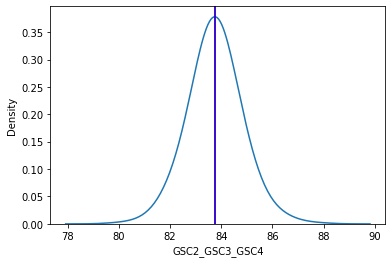

In [9]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC3_GSC4_Hmapped_angle_all)
xmean = np.mean(GSC2_GSC3_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(GSC2_GSC3_GSC4_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC2_GSC3_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

In [ ]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[84, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

In [ ]:
 # Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(BB2_BB3_pBB1_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_pBB1_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_pBB1_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

In [ ]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_pBB1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[125, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

In [ ]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_pBB1_pBB2_Hmapped_angle_all)
xmean = np.mean(BB3_pBB1_pBB2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(BB3_pBB1_pBB2_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_pBB1_pBB2_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_pBB1_pBB2_Hmapped_angle_all,bw=1.2)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_pBB1_pBB2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

In [ ]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_pBB1_pBB2_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[75, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

In [ ]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(ASC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(ASC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_BB3_pBB1_Hmapped_angle_all,bw=1.4)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  124.08089553673008
parameter K is:  4.888473311769724


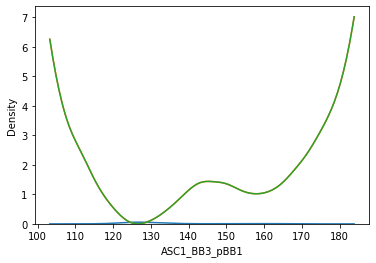

In [10]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_BB3_pBB1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[125, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

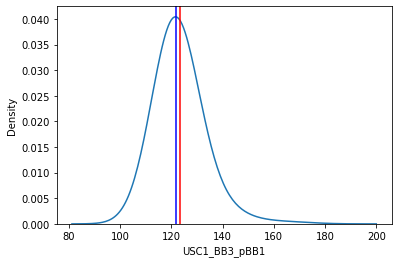

In [11]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(USC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(USC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC1_BB3_pBB1_Hmapped_angle_all,bw=1)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("USC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  124.10721810024833
parameter K is:  5.866750461064663


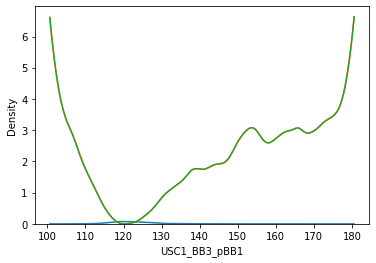

In [12]:
#get probability distribution from data
plt2 = sns.kdeplot(USC1_BB3_pBB1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[120, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

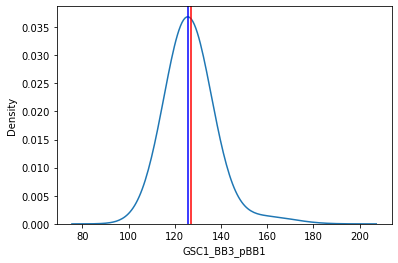

In [13]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(GSC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(GSC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_BB3_pBB1_Hmapped_angle_all,bw=1.2)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  124.05322203317542
parameter K is:  6.785909815388584


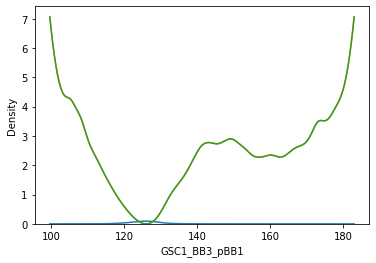

In [14]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_BB3_pBB1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[125, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

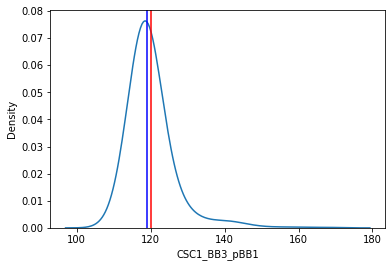

In [47]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC1_BB3_pBB1_Hmapped_angle_all)
xmean = np.mean(CSC1_BB3_pBB1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(CSC1_BB3_pBB1_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC1_BB3_pBB1_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC1_BB3_pBB1_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("CSC1_BB3_pBB1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  117.84527814691823
parameter K is:  6.466280973127827


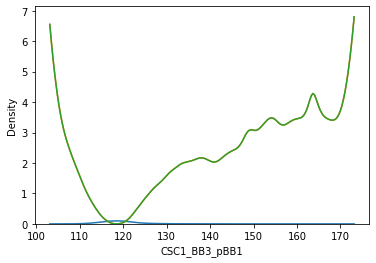

In [51]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC1_BB3_pBB1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[118, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

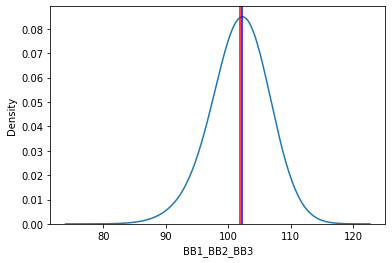

In [17]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_BB3_Hmapped_angle_all)
xmean = np.mean(BB1_BB2_BB3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(BB1_BB2_BB3_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_BB3_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_BB3_Hmapped_angle_all,bw=1.2)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB1_BB2_BB3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  102.08119780469494
parameter K is:  5.5336361493394115


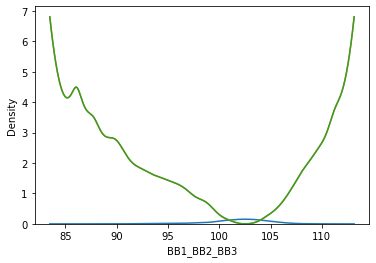

In [18]:
#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_BB3_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[103, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

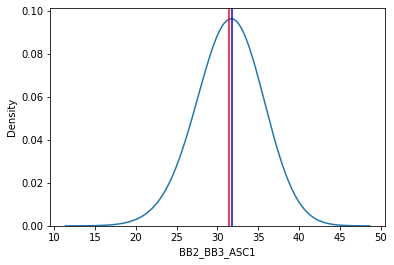

In [19]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_ASC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_ASC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(BB2_BB3_ASC1_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_ASC1_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_ASC1_Hmapped_angle_all,bw=1.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_ASC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  33.01072619959115
parameter K is:  4.224206073702692


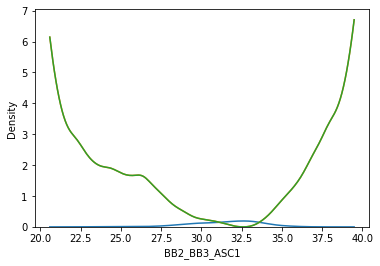

In [20]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_ASC1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[32.5, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

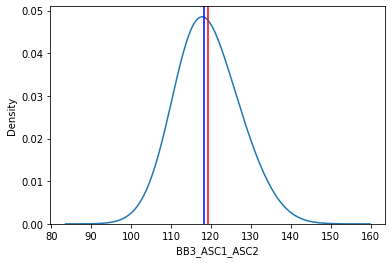

In [21]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_ASC1_ASC2_Hmapped_angle_all)
xmean = np.mean(BB3_ASC1_ASC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
# plt = sns.distplot(BB3_ASC1_ASC2_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_ASC1_ASC2_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_ASC1_ASC2_Hmapped_angle_all,bw=0.8)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_ASC1_ASC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  114.60428369069112
parameter K is:  4.689148148611614


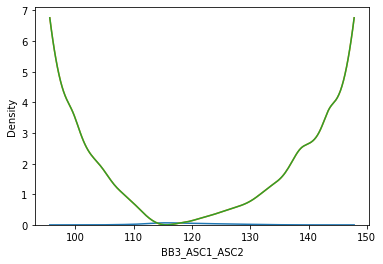

In [22]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_ASC1_ASC2_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[115, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

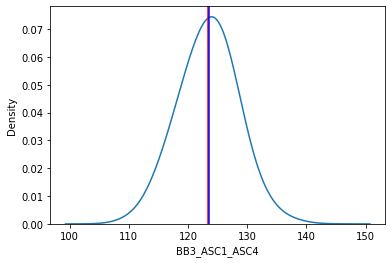

In [23]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_ASC1_ASC4_Hmapped_angle_all)
xmean = np.mean(BB3_ASC1_ASC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(BB3_ASC1_ASC4_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_ASC1_ASC4_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_ASC1_ASC4_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_ASC1_ASC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  124.0722337293797
parameter K is:  4.85645302685703


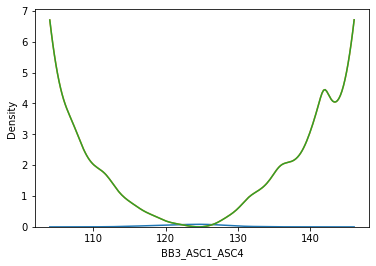

In [24]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_ASC1_ASC4_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[124, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

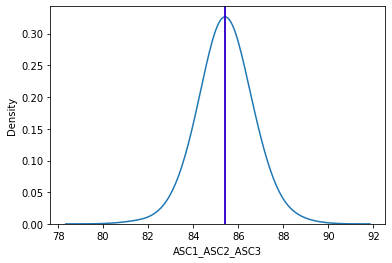

In [25]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_ASC2_ASC3_Hmapped_angle_all)
xmean = np.mean(ASC1_ASC2_ASC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(ASC1_ASC2_ASC3_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_ASC2_ASC3_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_ASC2_ASC3_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC1_ASC2_ASC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  86.3354873961724
parameter K is:  4.70689104974528


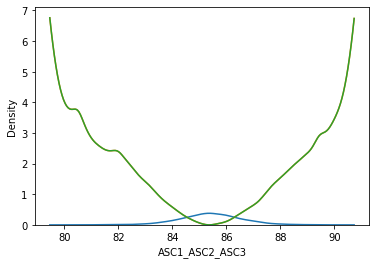

In [26]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_ASC2_ASC3_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[86, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

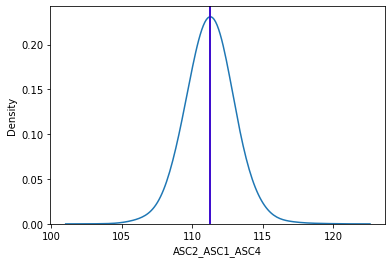

In [27]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC1_ASC4_Hmapped_angle_all)
xmean = np.mean(ASC2_ASC1_ASC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(ASC2_ASC1_ASC4_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC1_ASC4_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC1_ASC4_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC2_ASC1_ASC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  111.54909211629463
parameter K is:  5.995401952378926


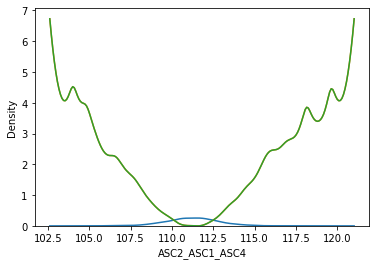

In [28]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC1_ASC4_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[111, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

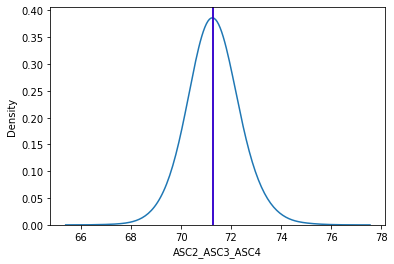

In [29]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC3_ASC4_Hmapped_angle_all)
xmean = np.mean(ASC2_ASC3_ASC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(ASC2_ASC3_ASC4_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC3_ASC4_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC3_ASC4_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC2_ASC3_ASC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  70.87542133377296
parameter K is:  4.8226869627746805


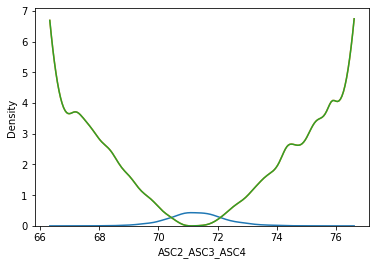

In [30]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC3_ASC4_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[71, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

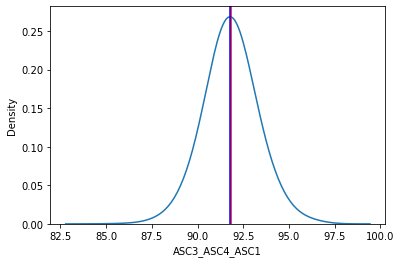

In [31]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC3_ASC4_ASC1_Hmapped_angle_all)
xmean = np.mean(ASC3_ASC4_ASC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(ASC3_ASC4_ASC1_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC3_ASC4_ASC1_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC3_ASC4_ASC1_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC3_ASC4_ASC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  75.39828877579285
parameter K is:  1.6104815875487297


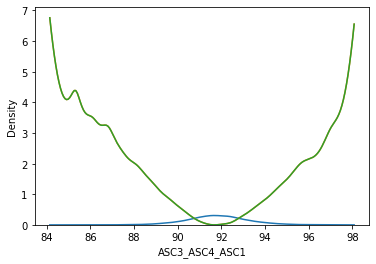

In [32]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC3_ASC4_ASC1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[91, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

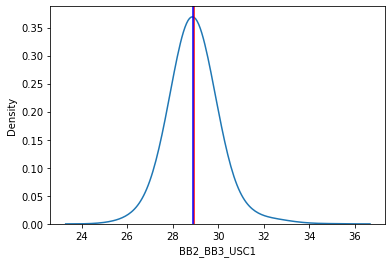

In [33]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_USC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_USC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(BB2_BB3_USC1_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_USC1_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_USC1_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_USC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  28.274333826657884
parameter K is:  1.5000779006289853


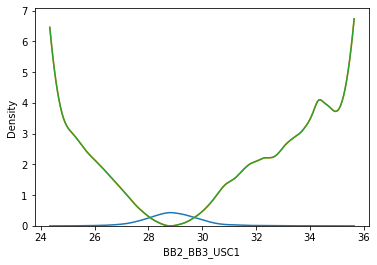

In [34]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_USC1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[29, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

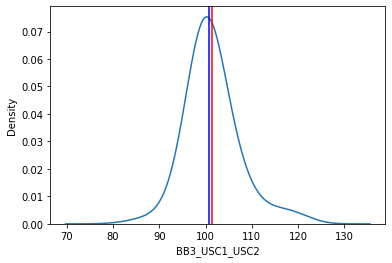

In [35]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_USC1_USC2_Hmapped_angle_all)
xmean = np.mean(BB3_USC1_USC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(BB3_USC1_USC2_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_USC1_USC2_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_USC1_USC2_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_USC1_USC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  97.38939446286996
parameter K is:  1.3692325420927287


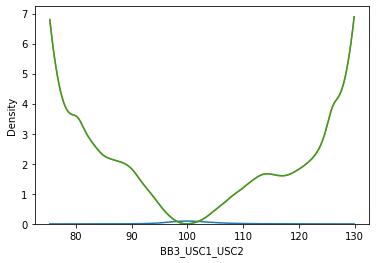

In [36]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_USC1_USC2_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[100, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

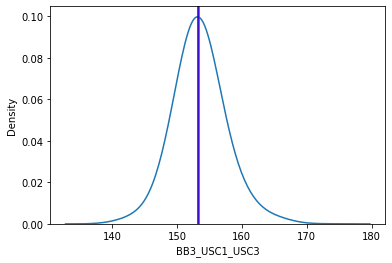

In [37]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_USC1_USC3_Hmapped_angle_all)
xmean = np.mean(BB3_USC1_USC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(BB3_USC1_USC3_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_USC1_USC3_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_USC1_USC3_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_USC1_USC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  152.4438825229397
parameter K is:  5.410328436522081


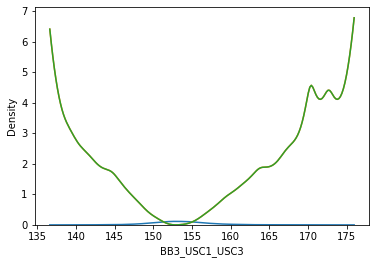

In [38]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_USC1_USC3_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[152, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

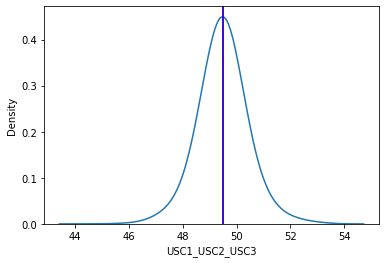

In [39]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC1_USC2_USC3_Hmapped_angle_all)
xmean = np.mean(USC1_USC2_USC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(USC1_USC2_USC3_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC1_USC2_USC3_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC1_USC2_USC3_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("USC1_USC2_USC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  48.80662900960353
parameter K is:  5.581737975108256


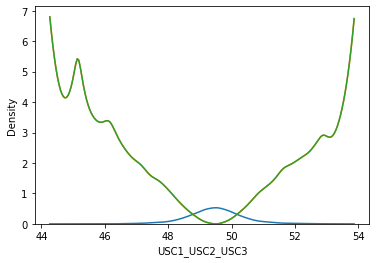

In [40]:
#get probability distribution from data
plt2 = sns.kdeplot(USC1_USC2_USC3_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[49, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

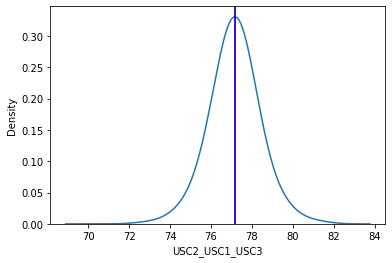

In [41]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC2_USC1_USC3_Hmapped_angle_all)
xmean = np.mean(USC2_USC1_USC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(USC2_USC1_USC3_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC2_USC1_USC3_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC2_USC1_USC3_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("USC2_USC1_USC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  76.95643862537227
parameter K is:  5.8624715353568515


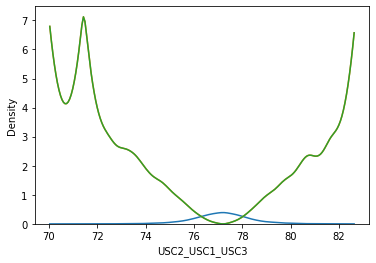

In [42]:
#get probability distribution from data
plt2 = sns.kdeplot(USC2_USC1_USC3_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[77, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

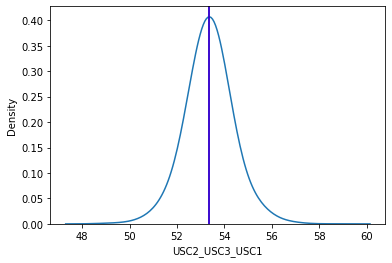

In [43]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC2_USC3_USC1_Hmapped_angle_all)
xmean = np.mean(USC2_USC3_USC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(USC2_USC3_USC1_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC2_USC3_USC1_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC2_USC3_USC1_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("USC2_USC3_USC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  53.40707696113723
parameter K is:  1.7648663564431961


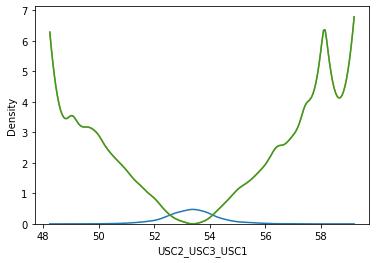

In [44]:
#get probability distribution from data
plt2 = sns.kdeplot(USC2_USC3_USC1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[54, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


NameError: name 'xmode' is not defined

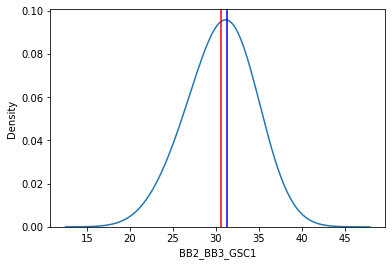

In [45]:
# plt = sns.distplot(BB2_BB3_GSC1_Hmapped_angle_all, kde=True, 
 
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_GSC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_GSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(BB2_BB3_GSC1_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_GSC1_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_GSC1_Hmapped_angle_all,bw=1.2)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_GSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  34.55751893236623
parameter K is:  1.1085960104007961


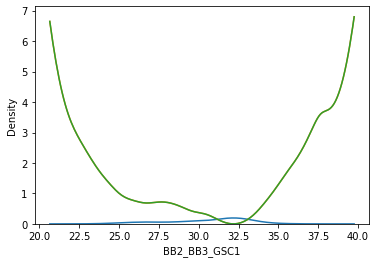

In [46]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_GSC1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[32, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_GSC1_GSC2_Hmapped_angle_all
Mean: Raw data 116.08540007993604
Mode: Raw data 118.35246498398296
Mode: Gauss-fitted 116.45216040926589


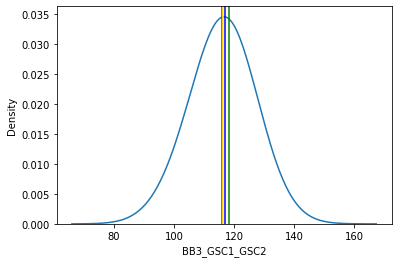

In [136]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_GSC1_GSC2_Hmapped_angle_all)
xmean = np.mean(BB3_GSC1_GSC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(BB3_GSC1_GSC2_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_GSC1_GSC2_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_GSC1_GSC2_Hmapped_angle_all,bw=1.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_GSC1_GSC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  120.8964481340062
parameter K is:  4.568031242602257


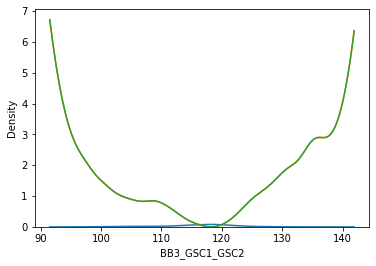

In [211]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_GSC1_GSC2_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[120, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_GSC1_GSC4_Hmapped_angle_all
Mean: Raw data 123.31831914468424
Mode: Raw data 121.2375889668827
Mode: Gauss-fitted 121.98406473126761


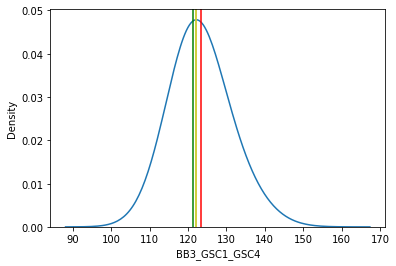

In [140]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_GSC1_GSC4_Hmapped_angle_all)
xmean = np.mean(BB3_GSC1_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(BB3_GSC1_GSC4_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_GSC1_GSC4_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_GSC1_GSC4_Hmapped_angle_all,bw=1.2)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_GSC1_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  121.01615389309214
parameter K is:  4.852742125188795


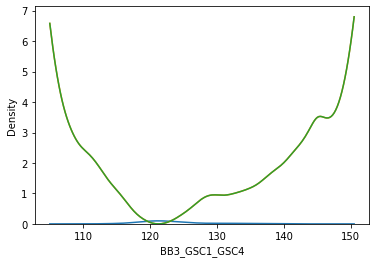

In [212]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_GSC1_GSC4_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[120, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_GSC2_GSC3_Hmapped_angle_all
Mean: Raw data 70.50148641087131
Mode: Raw data 70.53271553604549
Mode: Gauss-fitted 70.48221860125835


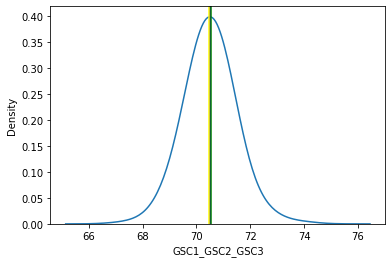

In [143]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_GSC2_GSC3_Hmapped_angle_all)
xmean = np.mean(GSC1_GSC2_GSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(GSC1_GSC2_GSC3_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_GSC2_GSC3_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_GSC2_GSC3_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC1_GSC2_GSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  70.68003820086894
parameter K is:  5.812445319416232


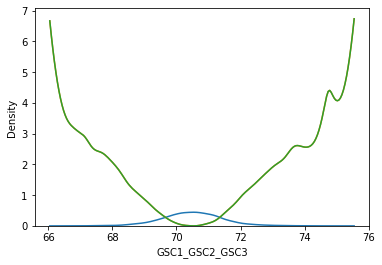

In [213]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_GSC2_GSC3_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[70, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC1_GSC4_Hmapped_angle_all
Mean: Raw data 113.06668445243805
Mode: Raw data 112.90463644980467
Mode: Gauss-fitted 113.07066215245874


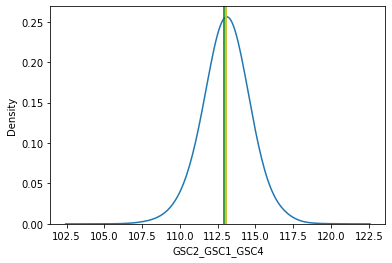

In [146]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC1_GSC4_Hmapped_angle_all)
xmean = np.mean(GSC2_GSC1_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(GSC2_GSC1_GSC4_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC1_GSC4_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC1_GSC4_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC2_GSC1_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  111.43802998125709
parameter K is:  6.070911830349774


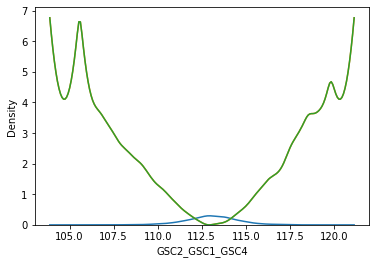

In [217]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC1_GSC4_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[112.5, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC3_GSC4_Hmapped_angle_all
Mean: Raw data 83.76020903277379
Mode: Raw data 83.89541470415786
Mode: Gauss-fitted 83.78091583211702


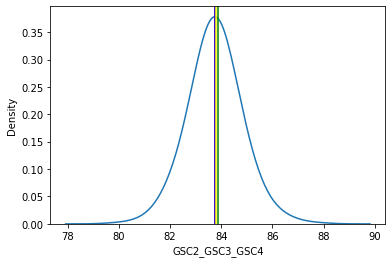

In [149]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC3_GSC4_Hmapped_angle_all)
xmean = np.mean(GSC2_GSC3_GSC4_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(GSC2_GSC3_GSC4_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_GSC4_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC2_GSC3_GSC4_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  86.27771752924907
parameter K is:  4.995553011841675


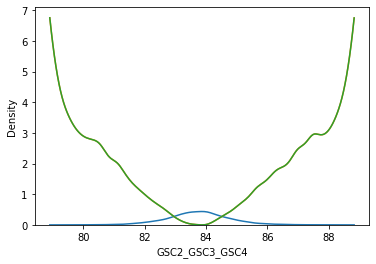

In [218]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC3_GSC4_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[84, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC3_GSC4_GSC1_Hmapped_angle_all
Mean: Raw data 92.45999120703436
Mode: Raw data 92.55620761320831
Mode: Gauss-fitted 92.44290947931441


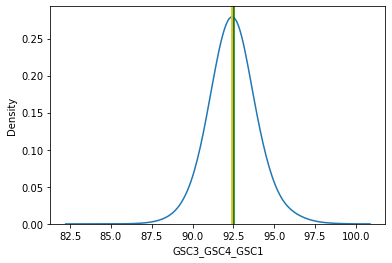

In [152]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC3_GSC4_GSC1_Hmapped_angle_all)
xmean = np.mean(GSC3_GSC4_GSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(GSC3_GSC4_GSC1_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC3_GSC4_GSC1_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC3_GSC4_GSC1_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC3_GSC4_GSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  92.82975046015378
parameter K is:  5.81081346424559


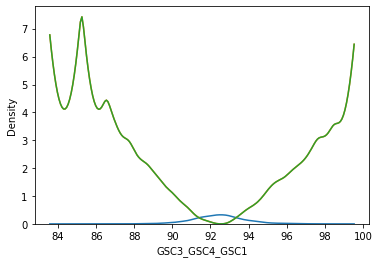

In [219]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC3_GSC4_GSC1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[92.5, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_CSC1_Hmapped_angle_all
Mean: Raw data 28.672519984012787
Mode: Raw data 28.69800867349136
Mode: Gauss-fitted 28.646417411965245


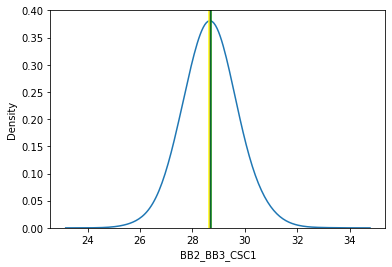

In [156]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_CSC1_Hmapped_angle_all)
xmean = np.mean(BB2_BB3_CSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(BB2_BB3_CSC1_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_CSC1_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_CSC1_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_CSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  34.557520369389216
parameter K is:  1.7758220816111854


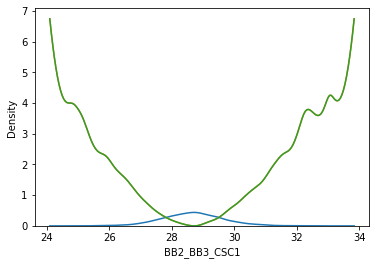

In [227]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_CSC1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[28.5, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_CSC1_CSC2_Hmapped_angle_all
Mean: Raw data 98.7188960831335
Mode: Raw data 98.06472118268042
Mode: Gauss-fitted 98.17220418482583


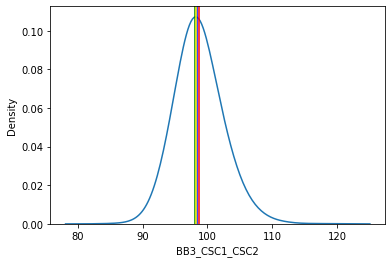

In [160]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_CSC1_CSC2_Hmapped_angle_all)
xmean = np.mean(BB3_CSC1_CSC2_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(BB3_CSC1_CSC2_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_CSC1_CSC2_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_CSC1_CSC2_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_CSC1_CSC2_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  98.92737094375477
parameter K is:  6.127577758628758


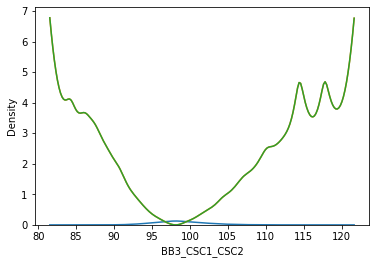

In [228]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_CSC1_CSC2_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[100, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_CSC1_CSC3_Hmapped_angle_all
Mean: Raw data 150.80294004796164
Mode: Raw data 150.7891694407457
Mode: Gauss-fitted 150.71083126355856


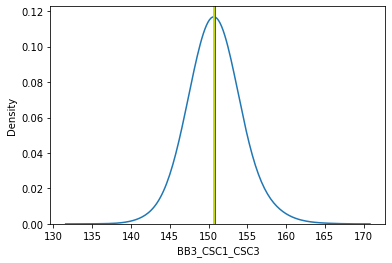

In [163]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_CSC1_CSC3_Hmapped_angle_all)
xmean = np.mean(BB3_CSC1_CSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(BB3_CSC1_CSC3_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_CSC1_CSC3_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_CSC1_CSC3_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_CSC1_CSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  150.79638941084082
parameter K is:  1.5118706607637107


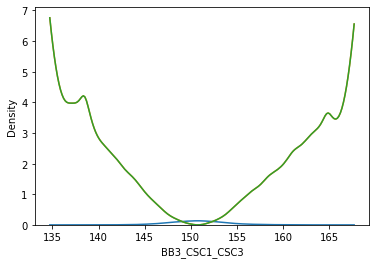

In [229]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_CSC1_CSC3_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[150, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC1_CSC2_CSC3_Hmapped_angle_all
Mean: Raw data 61.93528717026379
Mode: Raw data 61.76433062583007
Mode: Gauss-fitted 61.942638628002236


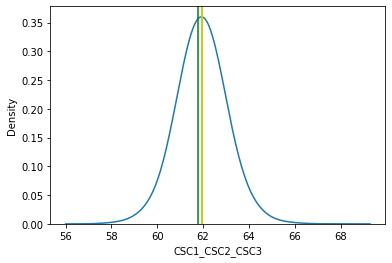

In [166]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC1_CSC2_CSC3_Hmapped_angle_all)
xmean = np.mean(CSC1_CSC2_CSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
# plt = sns.distplot(CSC1_CSC2_CSC3_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC1_CSC2_CSC3_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC1_CSC2_CSC3_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("CSC1_CSC2_CSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  61.39445472241308
parameter K is:  5.066190093865061


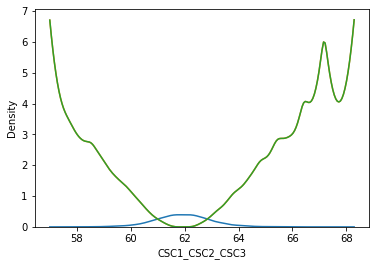

In [230]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC1_CSC2_CSC3_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[62, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC2_CSC1_CSC3_Hmapped_angle_all
Mean: Raw data 70.50179896083134
Mode: Raw data 70.4506498223571
Mode: Gauss-fitted 70.51677227751702


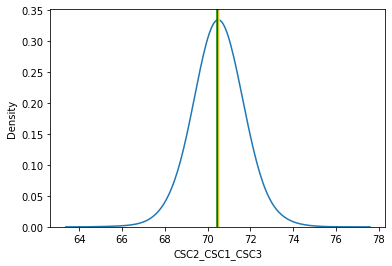

In [169]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC2_CSC1_CSC3_Hmapped_angle_all)
xmean = np.mean(CSC2_CSC1_CSC3_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(CSC2_CSC1_CSC3_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC2_CSC1_CSC3_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC2_CSC1_CSC3_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("CSC2_CSC1_CSC3_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  70.70427761905732
parameter K is:  5.884632129482528


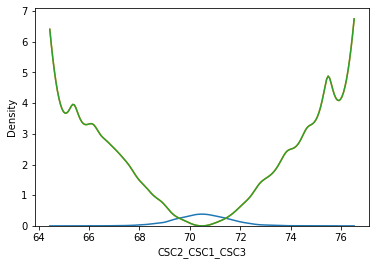

In [231]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC2_CSC1_CSC3_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[71, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC2_CSC3_CSC1_Hmapped_angle_all
Mean: Raw data 47.56292086330935
Mode: Raw data 47.63286659664973
Mode: Gauss-fitted 47.5704934371087


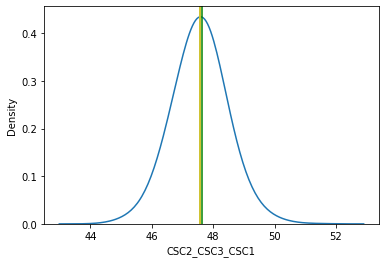

In [172]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC2_CSC3_CSC1_Hmapped_angle_all)
xmean = np.mean(CSC2_CSC3_CSC1_Hmapped_angle_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
# plt = sns.distplot(CSC2_CSC3_CSC1_Hmapped_angle_all, kde=True, 
#             color = 'darkblue',norm_hist=False,
#              kde_kws={'linewidth': 1}
#              )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC2_CSC3_CSC1_Hmapped_angle_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC2_CSC3_CSC1_Hmapped_angle_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("CSC2_CSC3_CSC1_Hmapped_angle_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  47.123889591556214
parameter K is:  1.8908322511161726


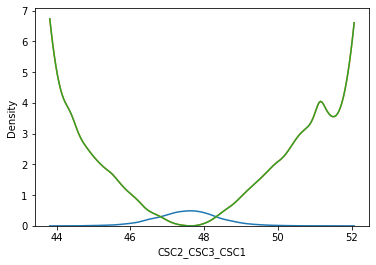

In [233]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC2_CSC3_CSC1_Hmapped_angle_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_angle, xdata,U, p0=[48, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])